In [6]:
# -*- coding: utf-8 -*-
import os, sys
import glob
import json
sys.path.append("..")
sys.path.append("../..")
import dataset_utils.utils
import dataset_utils.config as config
import pympi
import sklearn.metrics as metrics
from collections import defaultdict
import copy
import pickle
import utils
import smoothing_methods
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
prediction_dir = os.path.join(config.DS_DIALOG, "detection_result")
ant_dir = os.path.join(config.DS_DIALOG, "ant")
img_dir = os.path.join(config.DS_DIALOG, "image")
meta_dir = os.path.join(config.DS_DIALOG, "meta_info")
movie_files = ["01_01.MP4", "01_02.MP4", "02_01.MP4", "02_02.MP4", "03_01.MP4", "03_02.MP4", "04_01.MP4", "04_02.MP4", "05_01.MP4", "05_02.MP4"]
fig_dir = os.path.join(config.DS_DIALOG, "figure")
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)

In [4]:
test_ids = [("05_01", "A"), ("05_01", "C"), ("05_01", "D"), ("05_02", "A"), ("05_02", "C"), ("05_02", "D")]

In [131]:
def compare_results(labels, predictions_list, frame_num, start_t=0):
    x = [i for i in range(1, frame_num+1)]
    figsize=(20,5)
    fig, axes = plt.subplots(figsize=figsize)
    fig.suptitle(title, fontsize=16)
    axes.plot(x, labels, linewidth=2, color="black", label="true label")
    colors = ["blue", "green", "red"]
    names = ["CNN average", "CNN-LSTM", "CNN-LSTM Attention"]
    for i, predictions in enumerate(predictions_list):
        axes.plot(x, predictions, linewidth=1.0, color=colors[i], label=names[i])
#     plt.fill_between(x, predictions, 0, color="#C3DEF1")
    axes.legend()
    axes.set_ylim([0, 1.1])
    axes.set_ylabel("gaze (1) or non-gaze (0)", fontsize=18)
    axes.set_xlabel("time (s)", fontsize=18)
    axes.tick_params(direction='out', length=6, which='major')
    axes.tick_params(direction='out', length=3, which='minor')
    # set xticks at 1s (big) or 20s (not big)
    axes.set_xticks([i for i in range(0, frame_num+1, 20)])
    axes.set_xticklabels([i/20+start_t for i in range(0, frame_num+1, 20)])

In [132]:
def load_predictions(file_path, start_s=None, end_s=None, fps=20):
    labels, preds = pickle.load(open(file_path, "r"))
    preds = [pred[1] for pred in preds]
    if start_s is not None and end_s is not None:
        preds = preds[int(start*fps):int(end*fps)]
    return preds

In [133]:
def compare_3methods(movie_id, seat_id, start, end):
    # averageの結果
    frame_num = utils.frame_num(img_dir, movie_id)
    labels = utils.load_ts(movie_id, seat_id, ant_dir, frame_num)
    preds = utils.load_xs(movie_id, seat_id, prediction_dir, frame_num, "score")
    preds = [float(pred) for pred in preds]
    preds = smoothing_methods.pre_average_predictions(preds, window=best_window_size)
    labels = labels[int(start*fps):int(end*fps)]
    preds_ave = preds[int(start*fps):int(end*fps)]
    frame_num = len(labels)

    # lstmの結果
    path = os.path.join("./test_result/model_compare_lstm_02", "%s_%s.pickle" % (movie_id, seat_id))
    preds_lstm = load_predictions(path, start, end)

    # atlstmの結果
    path = os.path.join("./test_result/model_compare_atlstm_02", "%s_%s.pickle" % (movie_id, seat_id))
    preds_atlstm = load_predictions(path, start, end)

    assert len(preds_ave) == len(preds_lstm) == len(preds_atlstm)
    compare_results(labels, [preds_ave, preds_lstm, preds_atlstm], frame_num, start)

Parsing unknown version of ELAN spec... This could result in errors...


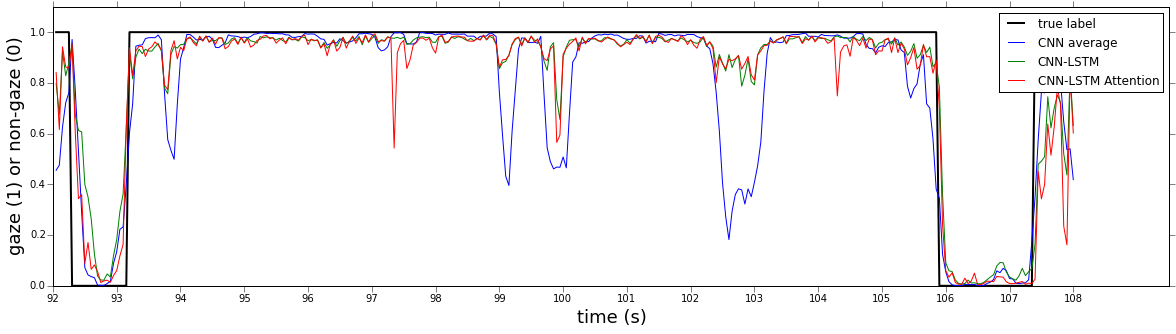

In [134]:
movie_id = "05_02"
seat_id = "D"
start = 92
end = 108
compare_3methods(movie_id, seat_id, start, end)

Parsing unknown version of ELAN spec... This could result in errors...


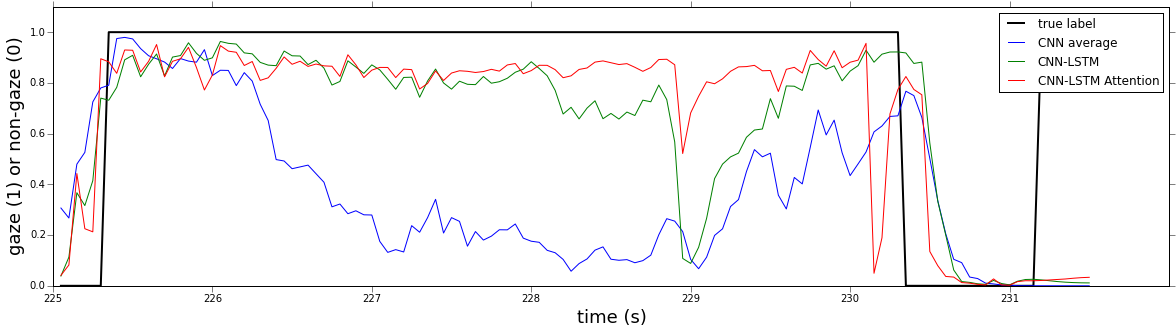

In [135]:
movie_id = "05_01"
seat_id = "C"
start = 225
end = 231.5
compare_3methods(movie_id, seat_id, start, end)

Parsing unknown version of ELAN spec... This could result in errors...


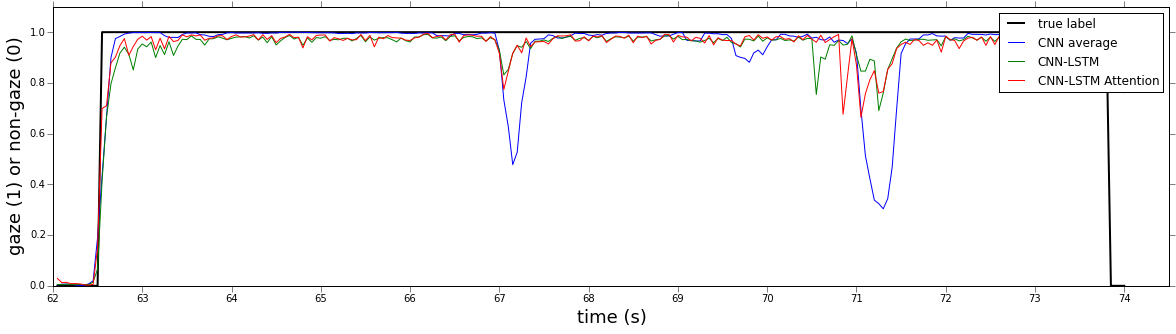

In [136]:
movie_id = "05_01"
seat_id = "D"
start = 62
end = 74
compare_3methods(movie_id, seat_id, start, end)

Parsing unknown version of ELAN spec... This could result in errors...


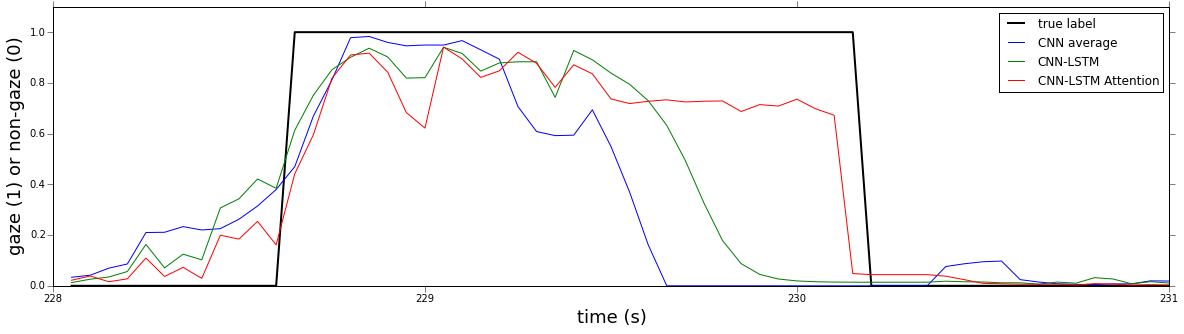

In [137]:
movie_id = "05_01"
seat_id = "A"
start = 228
end = 231
compare_3methods(movie_id, seat_id, start, end)